In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from piston import DMDPiston

from waveoptics.plots.plots import complex_imshow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 1500x500 with 2 Axes>, <Axes: >)

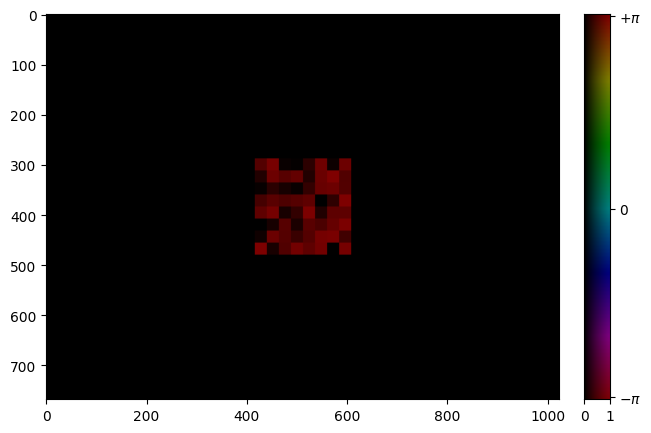

In [19]:
dmd = DMDPiston(8)
dmd.generate_fields(8, rand_amp=True, rand_phi=False)

complex_imshow(dmd.field_matrix)